In [1]:
import tensorflow 
print(tensorflow.__version__)

2.17.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv("F:\\0. The Data Psychology\\5. Deep Learning\ANN\\aps_data.csv")

In [6]:
data

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,6,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,neg,90,0,0,66,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0
2,neg,30,na,16,14,0,0,0,0,0,...,480,84,74,50,46,0,0,0,0,0
3,neg,444,na,14,12,0,0,0,0,0,...,1614,1144,3598,2460,1258,8524,110,0,0,0
4,neg,82,na,12,10,0,0,0,0,1464,...,1010,132,310,56,92,1292,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,neg,31394,na,0,na,0,0,0,0,0,...,393008,207182,367634,267778,106778,48688,57146,638,0,0
4996,neg,1598,na,0,na,0,0,0,0,0,...,5298,3164,9710,47042,2296,1098,3288,272,0,0
4997,neg,42,2,2130706454,56,0,0,0,0,0,...,660,272,334,76,14,0,0,0,0,0
4998,neg,32752,na,0,na,0,0,0,0,0,...,533772,37122,56252,23188,1138,134,22,0,0,0


In [7]:
df = data.copy()  

In [8]:
print(df.isnull().sum())                   # Check missing values column-wise
print(df.dtypes)                           # Data types of each column
print(df.head())                           # Show top 5 rows

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64
class     object
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 171, dtype: object
  class  aa_000 ab_000 ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002  ...  \
0   neg       6      0      0      0      0      0      0      0      0  ...   
1   neg      90      0      0     66      0      0      0      0      0  ...   
2   neg      30     na     16     14      0      0      0      0      0  ...   
3   neg     444     na     14     12      0      0      0      0      0  ...   
4   neg      82     na     12     10      0      0      0      0   1464  ...   

  ee_002 ee_003 ee_004 ee_005 ee_006 ee_007 ee_008 ee_009 ef_000 eg_000  
0     26      8     26     52      0      0      0      0      0      0  

In [9]:
for feature in [feature for feature in df.columns if feature not in ['class','int64']]:
    df[feature] = pd.to_numeric(df[feature], errors="coerce")  # Convert to numeric, invalid entries become NaN

In [10]:
df.dtypes

class      object
aa_000      int64
ab_000    float64
ac_000    float64
ad_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 171, dtype: object

In [11]:
print(df.isnull().sum().sort_values(ascending=False))  # See which features have missing values

br_000    4105
bq_000    4043
bp_000    3960
ab_000    3849
cr_000    3849
          ... 
cj_000      38
ci_000      38
bt_000      12
aa_000       0
class        0
Length: 171, dtype: int64


In [12]:
#Fill missing values with median (robust to outliers)
for feature in [feature for feature in df.columns if feature != 'class']:
    df[feature] = df[feature].fillna(df[feature].median())

In [13]:
print(df.isnull().sum().sort_values(ascending=False))

class     0
cs_003    0
cn_009    0
co_000    0
cp_000    0
         ..
ba_005    0
ba_006    0
ba_007    0
ba_008    0
eg_000    0
Length: 171, dtype: int64


In [14]:
X = df.drop("class", axis=1)               # Features (all except target)
y = df["class"]                             # Target variable (class label)

In [15]:
y

0       neg
1       neg
2       neg
3       neg
4       neg
       ... 
4995    neg
4996    neg
4997    neg
4998    neg
4999    neg
Name: class, Length: 5000, dtype: object

In [17]:
X.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26.0,8.0,26.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0
1,90,0.0,0.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1268.0,526.0,554.0,300.0,118.0,260.0,0.0,0.0,0.0,0.0
2,30,0.0,16.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,...,480.0,84.0,74.0,50.0,46.0,0.0,0.0,0.0,0.0,0.0
3,444,0.0,14.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1614.0,1144.0,3598.0,2460.0,1258.0,8524.0,110.0,0.0,0.0,0.0
4,82,0.0,12.0,10.0,0.0,0.0,0.0,0.0,1464.0,4980.0,...,1010.0,132.0,310.0,56.0,92.0,1292.0,0.0,0.0,0.0,0.0


In [18]:
y = pd.get_dummies(y, drop_first=True)    
# Converts 'pos/neg' to binary, drops first to avoid multicollinearity

In [19]:
y.head()

,pos
0,False
1,False
2,False
3,False
4,False


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)  # 80% train, 20% test


In [21]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()                      # Initialize Standard Scaler

X_train_scl = sc.fit_transform(X_train)    # Fit and transform training data (mean=0, std=1)
X_test_scl = sc.transform(X_test)          # Only transform test data using training mean & std

In [22]:
X_train_scl.shape, X_test_scl.shape, y_train.shape, y_test.shape

((4000, 170), (1000, 170), (4000, 1), (1000, 1))

In [ ]:
| Module/Function | Role / Kya Karta Hai?                                       | Kab Use Karein?              |
| --------------- | ----------------------------------------------------------- | ---------------------------- |
| `Sequential`    | Layers ko line-by-line stack karta hai                      | Jab flow straight ho         |
| `Dense`         | Fully connected layer — neurons ka group                    | Input/output + hidden layers |
| `Dropout`       | Overfitting prevent karta hai by randomly disabling neurons | Jab model overfit hone lage  |

In [23]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout

In [24]:
classifier = Sequential()                  # Sequential model: stack layers one by one

#### Forward propogation

In [25]:
#Input Layer + First Hidden Layer
classifier.add(Dense(units=10,                      # 10 neurons in first hidden layer
                     kernel_initializer='he_uniform', # Weight initialization suited for ReLU
                     activation='relu',              # Activation Function: ReLU
                     input_dim=170))                 # Number of input features = 170

In [26]:
#Second Hidden Layer
classifier.add(Dense(units=10,                       # 10 neurons in second hidden layer
                     kernel_initializer='he_uniform',
                     activation='relu'))

In [28]:
#Output Layer
classifier.add(Dense(units=1,                        # 1 neuron for binary classification output
                     kernel_initializer='glorot_uniform', # Xavier initializer suited for sigmoid
                     activation='sigmoid'))          # Sigmoid outputs probability (0 to 1)

#### Back propogation

In [29]:
classifier.compile(optimizer='adam',                # Optimizer: Adam (adaptive learning)
                   loss='binary_crossentropy',      # Loss: Binary classification
                   metrics=['accuracy'])            # Metric to monitor: Accuracy

In [30]:
classifier.summary()                                 # Shows layer-wise summary of model

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │           1,710 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,831 (7.15 KB)

 Trainable params: 1,831 (7.15 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
#Model Training
model_history = classifier.fit(X_train_scl,          # Corrected input: train data
                               y_train,              # Labels
                               batch_size=10,        # Batch size: 10 samples per update
                               epochs=30,            # Train for 30 full passes over data
                               validation_split=0.25) # 25% of train data used as validation

Epoch 1/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6584 - loss: 0.6230 - val_accuracy: 0.9740 - val_loss: 0.1713
Epoch 2/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9836 - loss: 0.0888 - val_accuracy: 0.9780 - val_loss: 0.1165
Epoch 3/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9892 - loss: 0.0396 - val_accuracy: 0.9800 - val_loss: 0.0832
Epoch 4/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9946 - loss: 0.0273 - val_accuracy: 0.9820 - val_loss: 0.0771
Epoch 5/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9901 - loss: 0.0259 - val_accuracy: 0.9830 - val_loss: 0.0713
Epoch 6/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9931 - loss: 0.0206 - val_accuracy: 0.9820 - val_loss: 0.0627
Epoch 7/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9952 - loss: 0.0151 - val_accuracy: 0.9850 - val_loss: 0.0704
Epoch 8/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9938 - loss: 0.0153 - val_accuracy: 0.

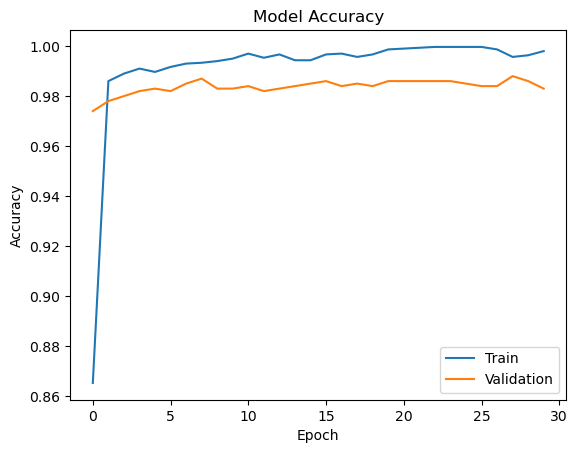

In [32]:
#Plot Training Accuracy & Loss
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

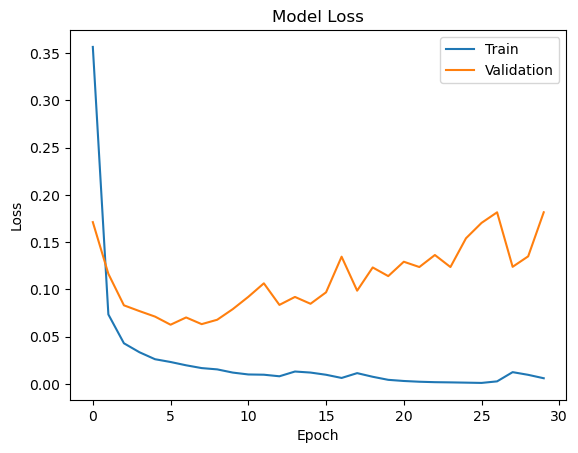

In [33]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [34]:
#Predictions on Test Data
y_pred = classifier.predict(X_test_scl)             # Predict probabilities

y_pred

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[1.86402316e-09],
       [2.56571986e-09],
       [1.04631488e-06],
       [2.09844103e-07],
       [2.81762347e-09],
       [9.72644365e-09],
       [5.52249257e-05],
       [3.76068812e-08],
       [1.03337727e-09],
       [1.24631283e-09],
       [8.77135873e-01],
       [1.15690998e-10],
       [1.46867762e-09],
       [2.18899521e-09],
       [1.57774804e-09],
       [2.42057219e-09],
       [3.52759513e-15],
       [8.68411576e-07],
       [4.53500135e-08],
       [7.14058785e-08],
       [4.52342941e-10],
       [3.45647355e-09],
       [1.48339268e-05],
       [2.46265445e-05],
       [3.21214189e-09],
       [9.73169456e-09],
       [1.09726643e-05],
       [7.45628768e-08],
       [2.23793052e-07],
       [4.34858993e-09],
       [5.97625949e-10],
       [8.43923209e-10],
       [5.02390265e-07],
       [4.42181900e-08],
       [2.97011682e-09],
       [3.08969972e-13],
       [7.19309057e-09],
       [2.17249038e-07],
       [1.27948026e-08],
       [1.65040219e-14],


In [35]:
y_pred1 = y_pred > 0.5                              # Convert to binary prediction using threshold 0.5

In [36]:
y_pred1

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [37]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred1))


[[978   5]
 [  6  11]]


In [38]:
#Save Trained Model
import time, os

def saveModel_path(model_dir="SAVED_MODELS"):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")    # Unique filename with timestamp
    model_path = os.path.join(model_dir, fileName)
    print(f"Model saved at: {model_path}")
    return model_path

In [39]:
classifier.save(saveModel_path())

Model saved at: SAVED_MODELS\Model_2025_08_04_20_32_08_.h5


In [40]:
#Hyperparameter Tuning using Keras Tuner
#!pip install keras-tuner --upgrade
from kerastuner.tuners import RandomSearch

In [41]:
#Define a model-building function for tuning
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=32,                       # First hidden layer with 32 neurons
                    kernel_initializer='he_uniform',
                    activation='relu',
                    input_dim=170))
    model.add(Dense(units=32, activation='relu'))  # Second hidden layer
    model.add(Dense(1, activation='sigmoid'))      # Output layer (binary)

    optimizer = hp.Choice("optimizer",              # Tuner will choose best optimizer
                          values=["adam", "sgd", "rmsprop", "adadelta"])
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [42]:
#Initialize tuner for random search
tuner = RandomSearch(build_model,
                     objective='val_accuracy',
                     max_trials=5,                # Try 5 different combinations
                     directory='project1',
                     project_name='aps-fault')

In [45]:
tuner

In [46]:
#Perform search on training data
tuner.search(X_train_scl, y_train,
             validation_data=(X_test_scl, y_test),
             epochs=5)

Trial 4 Complete [00h 00m 07s]
val_accuracy: 0.9890000224113464

Best val_accuracy So Far: 0.9890000224113464
Total elapsed time: 00h 00m 27s


In [47]:
#Get best model and hyperparameters

print(tuner.get_best_hyperparameters()[0].values)

{'optimizer': 'adam'}


In [48]:
mymodel = tuner.get_best_models(num_models=1)[0]

In [49]:
mymodel

<Sequential name=sequential, built=True>

In [50]:
mymodel.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │           5,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,561 (25.63 KB)

 Trainable params: 6,561 (25.63 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
# ADVANCED Hyperparameter Tuning (more layers + learning rate)
from tensorflow.keras import optimizers

def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 2, 5)):              # Tune number of hidden layers (2 to 5)
        model.add(Dense(units=hp.Int(f'units_{i}', 32, 512, step=32),  # Tune neurons in each layer
                        activation='relu'))

    model.add(Dense(1, activation='sigmoid'))                # Output layer

    model.compile(optimizer=optimizers.Adam(
                        hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])), # Tune learning rate
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [52]:
#New tuner instance with advanced tuning
tuner_second = RandomSearch(build_model,
                            objective='val_accuracy',
                            max_trials=5,
                            directory='project3',
                            project_name='aps-fault-sensor')

In [53]:
#Run the tuner search
tuner_second.search(X_train_scl, y_train,
                    epochs=5,
                    validation_data=(X_test_scl, y_test))

Trial 5 Complete [00h 00m 07s]
val_accuracy: 0.984000027179718

Best val_accuracy So Far: 0.9909999966621399
Total elapsed time: 00h 00m 51s


In [54]:
#Get best model
classifier2 = tuner_second.get_best_models(num_models=1)[0]
classifier2.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (32, 416)                   │          71,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 448)                   │         186,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (32, 160)                   │          71,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (32, 416)                   │          66,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (32, 1)                     │             417 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 397,185 (1.52 MB)

 Trainable params: 397,185 (1.52 MB)

 Non-trainable params: 0 (0.00 B)